In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
loans = pd.read_pickle("loans_ALL.pkl")

In [4]:
grades = sorted(loans.grade.unique())
sub_grades = ['%s%i' % (g,i) for g in grades for i in range(1,6)]
loans['sub_grade'] = pd.Series([sub_grades[i] for i in np.where(loans.loc[:, 'sub_grade_A1':'sub_grade_G5'])[1]], 
                              index=loans.index.copy())

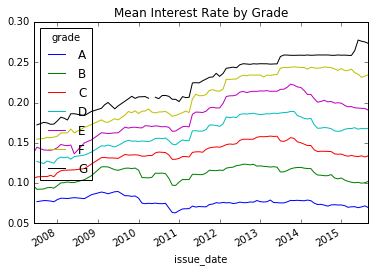

In [74]:
loans.groupby(['issue_date', 'grade']).int_rate.mean().unstack().plot(title='Mean Interest Rate by Grade')
plt.savefig('mean_int_rate_by_grade.png')

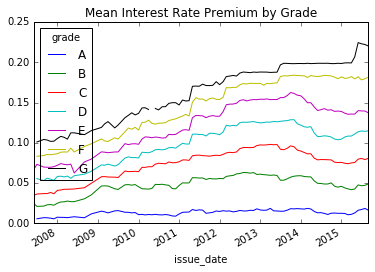

In [73]:
loans.groupby(['issue_date', 'grade']).int_premium.mean().unstack().plot(title='Mean Interest Rate Premium by Grade')
plt.savefig('mean_int_rate_prem_by_grade.png')

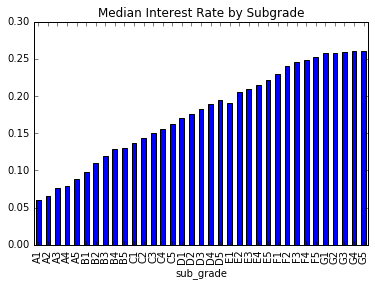

In [72]:
loans.groupby('sub_grade').int_rate.median().plot(kind='bar', title='Median Interest Rate by Subgrade')
plt.savefig('median_int_rate_by_subgrade.png')

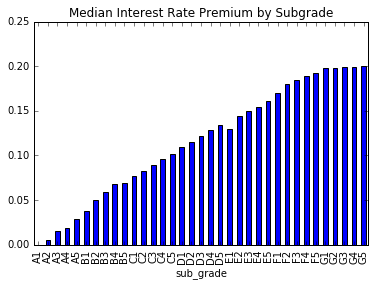

In [71]:
loans.groupby('sub_grade').int_premium.median().plot(kind='bar', title='Median Interest Rate Premium by Subgrade')
plt.savefig('median_int_rate_prem_by_subgrade.png')

In [47]:
historical_default_by_subgrade = 1-loans.groupby('sub_grade').loan_status_binary.sum()/loans.sub_grade.value_counts()

In [51]:
historical_default_by_grade = 1-loans.groupby('grade').loan_status_binary.sum()/loans.grade.value_counts()

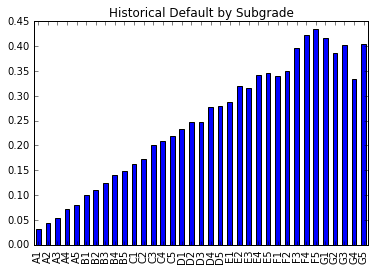

In [70]:
historical_default_by_subgrade.plot(kind='bar', title='Historical Default by Subgrade')
plt.savefig('hist_def_rate_by_subgrade.png')

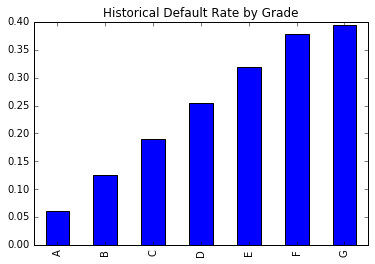

In [69]:
historical_default_by_grade.plot(kind='bar', title='Historical Default Rate by Grade')
plt.savefig('hist_def_rate_by_grade.png')

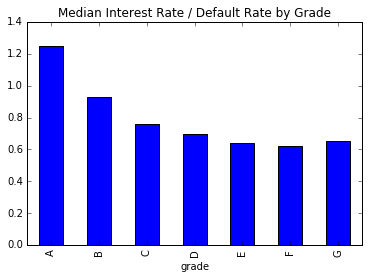

In [68]:
(loans.groupby('grade').int_rate.median()/historical_default_by_grade).plot(kind='bar', title='Median Interest Rate / Default Rate by Grade')
plt.savefig('median_int_div_default_by_grade.png')